<a href="https://colab.research.google.com/github/agamthind96/Machine_Learning_Theory/blob/main/Decision_Trees_and_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

- Decision Trees are the fundamental components of Random Forests.
- Decision Trees doesn't require any feature scaling.
- A node's **Sample** attribute counts how many training instance it applies to.
- A node's **Value** attribute tells us how many training instances of each class this nodel applies to.
- A node's **Gini** attribute measures its impurity.A node is pure or Gini score=0 if all training instances it applies to belongs to same class.


In [1]:
import tensorflow as tf

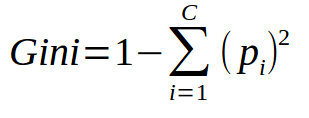

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Ginni impurity.png"
tf.keras.utils.load_img(
    path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest'
)


## CART Training Algorithm

This algorithm works by first splitting the training set into two subsets using a single feature k and threshold value t(k) that produces the purest subset.

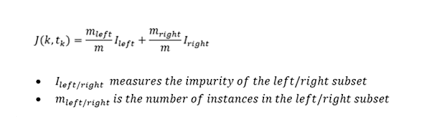

In [3]:
path = "/content/drive/MyDrive/Colab Notebooks/CART cost function.png"
tf.keras.utils.load_img(
    path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest'
)



## Entropy Formula

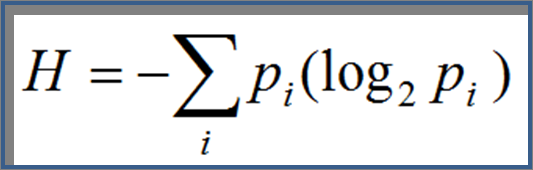

In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Entrop_ml.png"
tf.keras.utils.load_img(
    path, grayscale=False, color_mode='rgb', target_size=None,
    interpolation='nearest'
)

- The difference between Ginni impurity and Entropy is that Ginni impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced treees.

- Decision Tree is a non-parametric model because the number of parameters is not determined prior to training, so the model structure is free to stick closely to data and in contrast, a parametric model, such as Linear model, has a predetermined number of parameters i.e. it's degree of freedom is limited.

## Hyperparameters of Decision Tree model

- **max_depth** : decides the maximum depth of the tree and by default it's value is None.
- **min_samples_split** : the minimum number of samples a node must have before it can be split.
- **min_samples_leaf** : the minimum number of samples a leaf node must have.
- **max_leaf_nodes** : the maximum number of leaf nodes.
- **max_features** : the maximum number of features that are evaluated for splitting at each node.


- Pruning is the process of deleting unnecessary nodes.

- from sklearn.tree import DecisionTreeClassifier
- from sklearn.tree import DecisionTreeRegressor

## Limitations of Decision Tree

- Decision Tree loves orthogonal boundary which makes them sensitive to training set rotation.(One way to overcome this problem is to use Principal Component Analysis which often results in better orientation of training data).
- Decision Trees are very sensitive to small variation in the training data.

# Ensemble Learning

- Ensemble Learning is based on the concept of **Wisdom of Crowd**.
- If we aggregate the predictions of a group of predictors, then we often get better predictions than with best individual predictor and this technique is called **Ensemble Learning**.
- Suppose we train a group of Decision Tree classifiers, each on different random subset of the training set and while making predictions, we obtain the prediction of all individual trees and the predict the class with the most votes. Such an ensemble of Decision Trees is called **Random Forest**.

## Hard-Voting

In hard voting (also known as majority voting), every individual classifier votes for a class, and the majority wins.

## Important Note

- Ensemble methods work best when the predictors are as independent from another as possible. One way to get diverse classifiers is to train them using very different algorithms.This increases the chance that they will make very different types of errors, improving the ensemble's accuracy.

## More from Scikit-Learn Library.
- from sklearn.ensemble import RandomForestClassifier
- from sklearn.ensemble import Voting Classifier

## Soft-Voting

- If all the classifiers are able to estimate clas probabilities, then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called **Soft Voting**.

## Bagging(Bootstrap Aggregating) and Pasting

- There is another approach of ensemble learning in which we use the same training algorithm for every predictor and train them on different subsets of the training set.When sampling is performed with replacement, this method is called **Bagging** and when sampling is performed without replacement, it is called **Pasting**.

- The aggregation function used for all predictors is **statistical Mode**.



### Code for Bagging 

In [21]:

from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.15)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy of the model using Bagging is {accuracy*100}%.')

The accuracy of the model using Bagging is 99.0%.


### Code for Pasting

In [6]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.15)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1)   # Make bootstrap=False

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy of the model using Pasting is {accuracy*100}%.')

The accuracy of the model using Pasting is 99.0%.


### Out of Bag Evaluation

- By default a BaggingClassifier samples m training instances with replacement where m is the size of training set.This means on an average 63% of the training instances are sampled for each predictor and 37% are not sampled and are called Out-of-bag instances which can be evaluated seperately after training without requirement of validation set.

In [7]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000,noise=0.15)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)

bag_clf.fit(X_train,y_train)

y_pred = bag_clf.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print(f'The accuracy of the model using Bagging is {accuracy*100}%.')

oob = bag_clf.oob_score_
print(f'The Out of Bag evaluation score is {oob*100}%.')

The accuracy of the model using Bagging is 97.5%.
The Out of Bag evaluation score is 97.375%.


In [8]:
bag_clf.oob_decision_function_

array([[0.90990991, 0.09009009],
       [0.01345291, 0.98654709],
       [0.00692841, 0.99307159],
       ...,
       [0.01363636, 0.98636364],
       [0.03009259, 0.96990741],
       [0.00686499, 0.99313501]])

## Random Patches and Random Subspaces

- Feature sampling is also supported by BaggingClassifier class and is controlled by 2 hyperparameters : **max_features** and **bootstrap_features**.
- Sampling both training instances and features is called **Random Patches** method.
- If sampling is only done for training features, then it is called **Random Subspaces** method.

## Random Forests

- RandomForestClassifier has all hyperparameters of a DecisionTreeClassifier (to control how trees are grown) + all the hyperparameters of BaggingClassifier to control the ensemble.
- from sklearn.ensemble import RandomForestClassifier.

## Extra-Trees

- When we are growing a tree in the Random Forest, at each node only a random subset of the features is considered for splitting and it is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds.
- A forest of such extremely random trees is called an **Extremely Randomized Trees** ensemble or **Extra-Trees**.
- from sklearn.ensemble import ExtraTreesClassifier (class)

## Feature Importance

- Scikit-Learn measures the Feature importance by looking at how much the tree nodes that use that feature reduce mpurity on average. More precisely, it is the weighted average, where each node's weight is equal to number of trainign samples that are associated with it.

- *feature_importances_* variable

## Boosting

- It is an ensemble method that can combine several weak learners into a strong learner.
- **AdaBoost (Adaptive Boosting)** : It is a technique in which a new predecessor pays a bit more attention to the training instances that the predecessor underfitted and this results in new predictors focusing more and more on the hard cases.
- Scikit-Learn uses a multiclass version of AdaBoost called SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function).

### AdaBoost code

In [10]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             algorithm="SAMME.R", learning_rate=0.5)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

In [12]:
y_preds = ada_clf.predict(X_test)

In [14]:
accuracy_adaboost = accuracy_score(y_preds, y_test)
print(f'The accuracy of the model using AdaBoost is {accuracy_adaboost*100}%.')

The accuracy of the model using AdaBoost is 97.0%.


### Gradient Boosting

- Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration just like AdaBoost does, this method tries to fit the new predictor to the **residual errors** made by previous predictor.

### Gradient Boosting code

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
gbrt.fit(X_train,y_train)



GradientBoostingClassifier(learning_rate=1.0, max_depth=2, n_estimators=3)

In [22]:
y_pred = gbrt.predict(X_test)
accuracy_gbrt = accuracy_score(y_pred,y_test)
print(f'The accuracy of the model using Gradient Boosting technique is {accuracy_gbrt*100}%.')

The accuracy of the model using Gradient Boosting technique is 97.0%.


- The GradientBoostingRegressor class also supports a subsample hyperparameter, which specifies the fraction of training instances to be used for training each tree and this technique trades a higher bias for lower variance. This technique is called **Stochastic Gradient Boosting**.

- There is an optimized implementation of Gradient Boosting available in the popular Python library XGBoost (Extreme Gradient Boosting).


### Code for XGBoost


In [25]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(X_train,y_train)
y_pred = xgb_clf.predict(X_test)

accuracy_xg = accuracy_score(y_test,y_pred)
print(f'The accuracy score of the model using XGBoost technique is {accuracy_xg*100}%.')

The accuracy score of the model using XGBoost technique is 99.5%.


## Stacking (Stacked Generalization)

- Stacking is an ensemble technique that uses a new model to learn how to best combine the predictions from two or more models trained on your dataset.

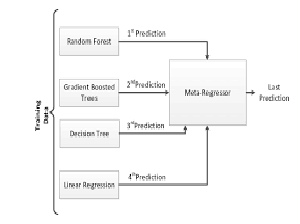

In [29]:
path = "/content/drive/MyDrive/Colab Notebooks/stacked_generalization.png"
tf.keras.utils.load_img(
    path, grayscale=False, color_mode='rgb', target_size=(224,300),
    interpolation='nearest'
)
